In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
df = sns.load_dataset("tips")

# Substituindo o nome da coluna.

df.rename(columns={"sex":"gender"}, inplace=True)
df.head()


,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df["tips_pct"] = round(df["tip"] / (df['total_bill'] - df['tip']),2)
df.head()

,total_bill,tip,gender,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.19
2,21.01,3.50,Male,No,Sun,Dinner,3,0.20
3,23.68,3.31,Male,No,Sun,Dinner,2,0.16
4,24.59,3.61,Female,No,Sun,Dinner,4,0.17


**Como podemos maximizar a gorjeta ganha por garçom?**

Como se trata justamente do módulo de árvores de decisão, se dará por meio do uso de tais modelos, com a diferença que aqui o produto final não será um termo de valor discreto, mas continuo. Nesse sentido, como iremos realizar um modelo de uma árvore, faz-se necessário conceber o valor de quebra, por meio da qual nos fará ir até uma resposta final.

O valor de quebra se relaciona a dois métodos potenciais, a do erro quadrático  médio e (EQM) a do erro absoluto médio (EAM). Por questões de propriedade matemática, o EQM é o que acaba sendo comumente utilizado. A partir dele, obtêm-se o coeficiente de determinação também necessário, que é o R², que nos auxilia a entender o quão bom é o modelo adotado.

In [4]:
# Valores estatísticos acerca das gorjetas:

df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

**Realizar uma visualização exploratória dos dados:**

* Gráfico de perfil de média:

<ipython-input-5-92edde7c418f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="gender", y="tip", data=df,


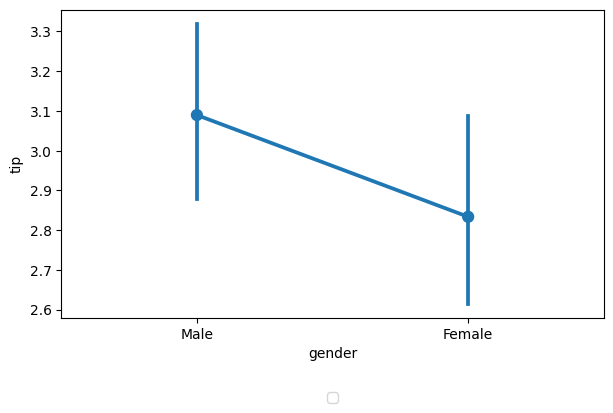

In [5]:
plt.rc("figure", figsize=(7,4))

sns.pointplot(x="gender", y="tip", data=df,
                  dodge=True, ci=95)

plt.legend(loc = "lower center", bbox_to_anchor=(0.5, -0.30), ncol=3)

<ipython-input-6-1a62d5ea09e8>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="smoker", y="tip", data=df,


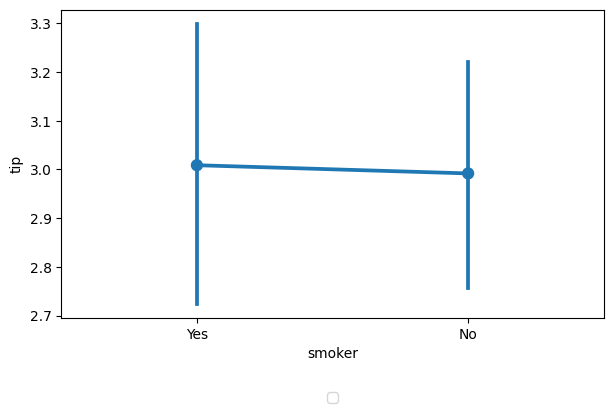

In [6]:
plt.rc("figure", figsize=(7,4))

sns.pointplot(x="smoker", y="tip", data=df,
                  dodge=True, ci=95)

plt.legend(loc = "lower center", bbox_to_anchor=(0.5, -0.30), ncol=3)

<ipython-input-7-62ab5aa57839>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="day", y="tip", data=df,


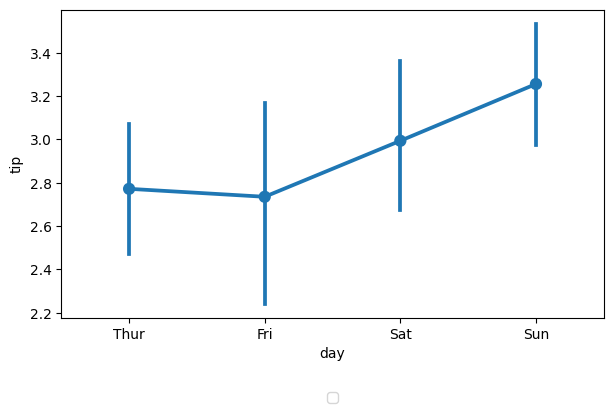

In [7]:
plt.rc("figure", figsize=(7,4))

sns.pointplot(x="day", y="tip", data=df,
                  dodge=True, ci=95)

plt.legend(loc = "lower center", bbox_to_anchor=(0.5, -0.30), ncol=3)

<ipython-input-8-5c1ed513c2c3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="time", y="tip", data=df,


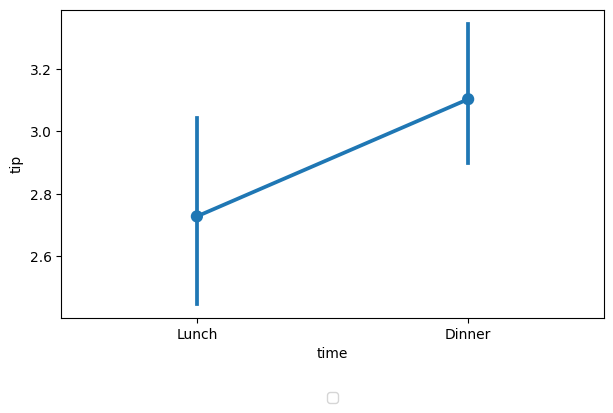

In [8]:
plt.rc("figure", figsize=(7,4))

sns.pointplot(x="time", y="tip", data=df,
                  dodge=True, ci=95)

plt.legend(loc = "lower center", bbox_to_anchor=(0.5, -0.30), ncol=3)

<ipython-input-9-86197a28a744>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x="size", y="tip", data=df,


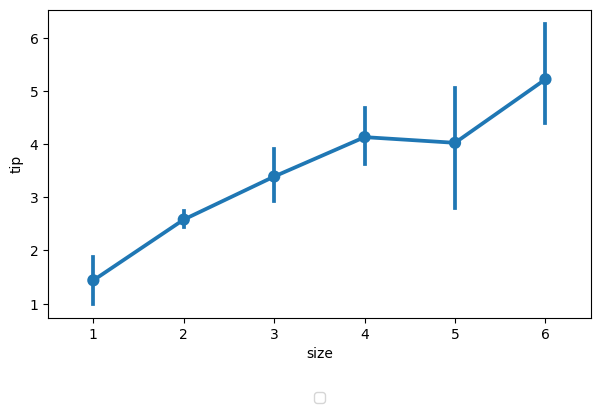

In [9]:
plt.rc("figure", figsize=(7,4))

sns.pointplot(x="size", y="tip", data=df,
                  dodge=True, ci=95)

plt.legend(loc = "lower center", bbox_to_anchor=(0.5, -0.30), ncol=3)

<Axes: xlabel='size', ylabel='count'>

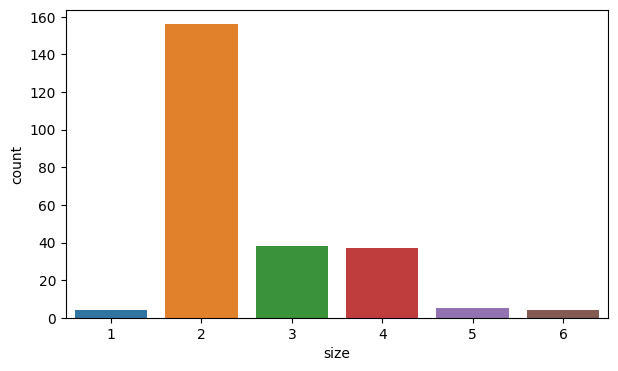

In [10]:
sns.countplot(x="size", data=df)

Ainda que a maior quantidade dos pedidos são para mesas compostas por duas pessoas, sendo seguida para mesas de três a quatro pessoas respectivamente, as gorjetas maiores são aquelas provenientes de mesas maiores, encontrando o seu pico em mesas compostas por seis pessoas, como o gráfico de média de perfil nos permite observar.

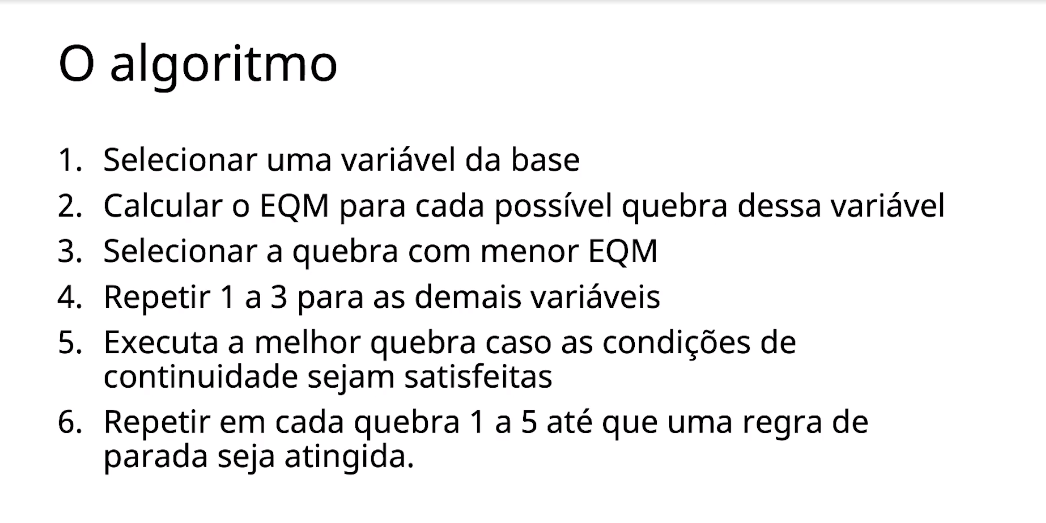

In [11]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib inline

In [12]:
# Como o desafio se consiste em otimizar a aquisição de gorjetas ao garçom e
# ele não dispõe das informações prévias acerca do total da compra, da porcentagem
# da gorjeta e nem de seu valor enquanto tal, iremos desconsiderar tais colunas
# para realizar a criação do modelo da árvore de regressão:

df_2 = df.drop(columns=["total_bill", "tip", "tips_pct"])
df_2.head()

,gender,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4


In [13]:
# Discretizando as categorias presentes no banco de dados.
# Para utilizar o dataframe numa árvore de decisão eu preciso, antes,
# transformar os dados categóricos em numéricos.

# Entendendo o drop_first=True:
# Quando eu passo esse parâmetro eu excluo a primeira coluna que seria
# elaborada a partir da discretização, isso evita que as variáveis fiquem
# altamente correlacionadas, aumentando a inconscistência da análise.

df_2 = pd.get_dummies(df_2, drop_first=True)

df_2.head()

,size,gender_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,2,1,1,0,0,1,1
1,3,0,1,0,0,1,1
2,3,0,1,0,0,1,1
3,2,0,1,0,0,1,1
4,4,1,1,0,0,1,1


In [14]:
# Segmentando os dados:

y = df['tip']
X = df_2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

# Criando as árvores de regressão:

a_regr1 = DecisionTreeRegressor(max_depth=2)
a_regr2 = DecisionTreeRegressor(max_depth=8)

# Treinando os modelos:

a_regr1.fit(X_train, y_train)
a_regr2.fit(X_train, y_train)

# Calculando o coeficiente de determinação, o R²:

mse1 = a_regr1.score(X_train, y_train)
mse2 = a_regr2.score(X_train, y_train)

template = "O MSE da árvore com profundidade={0} é: {1:.2f}"

print(template.format(a_regr1.get_depth(), mse1).replace(".", ","))
print(template.format(a_regr2.get_depth(), mse2).replace(".", ","))

O MSE da árvore com profundidade=2 é: 0,25
O MSE da árvore com profundidade=8 é: 0,44


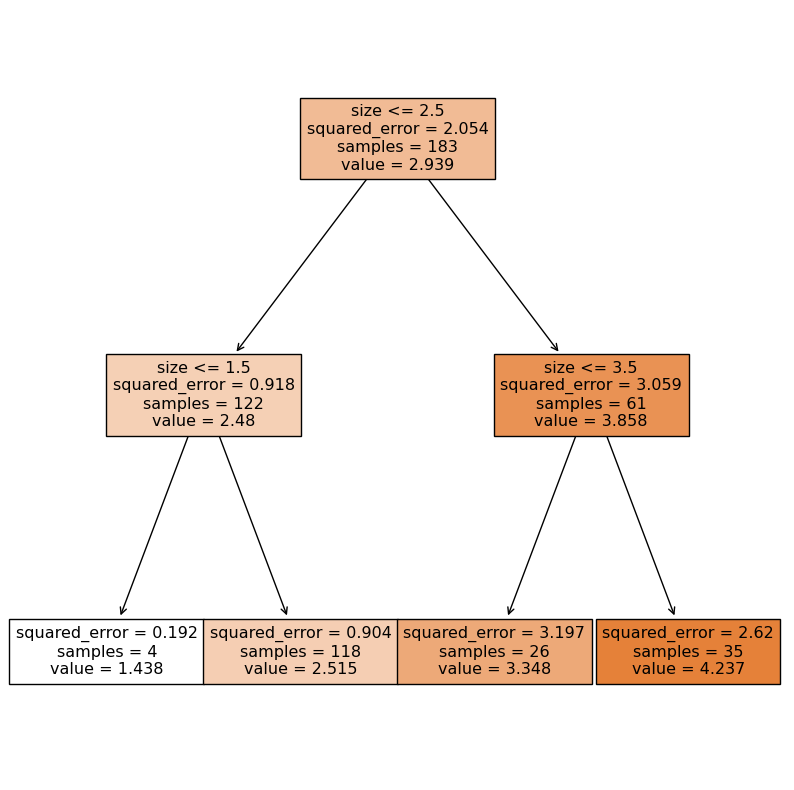

In [15]:
# Visualizando a árvore:

plt.rc("figure", figsize=(10,10))

tree = tree.plot_tree(a_regr1, feature_names=X.columns,
                      filled=True)

In [17]:
import sklearn.tree

plt.rc("figure", figsize=(10,10))

plot_tree(a_regr2, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.show()

NameError: ignored

In [1]:
# from dtreeviz.trees import dtreeviz # remember to load the package

# dtreeviz(regr_1, X, y,
 #               target_name="target",
  #              feature_names=X.columns)

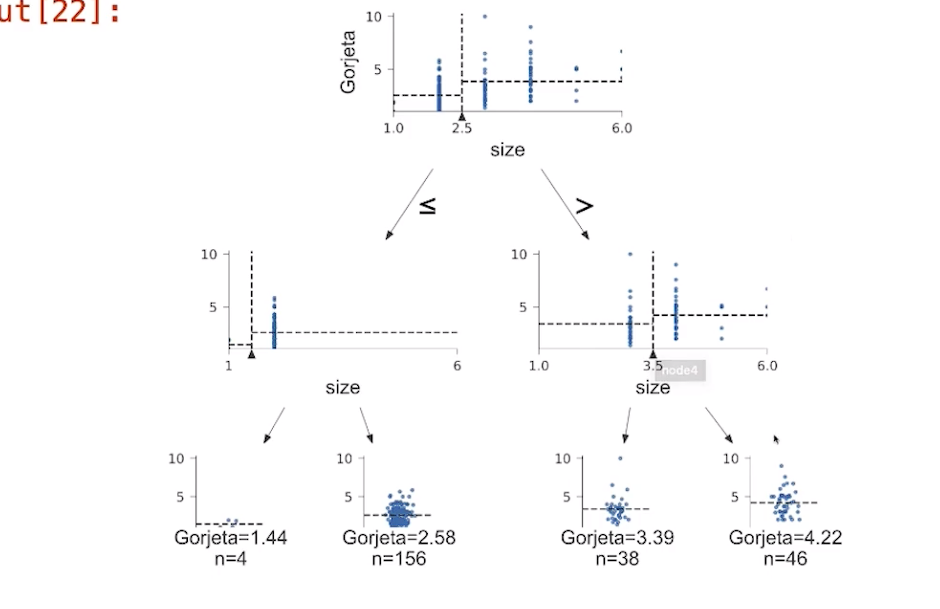